# Projet Machine learning & Fouille des données 

## Step1-Chargements des bibliothéques à utiliser.
Pandas,Sklearn,Numpy,Matplot,Seaborn. (#itérative)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Step2- Transformation des données en data Frame.

In [ ]:
data = pd.read_csv("data.csv",sep=";")
data.head()
#type(data)

## Step3- Visualisation des données(Comprendre les données)

In [ ]:
#nombre des lignes
data.count()

In [ ]:
#passons à détailler de plus les information sur notre base
print(data.info())

In [ ]:
#Nous illustrons dans le tableau suivant des détails statistiques plus profonde sur notre base de données
data.describe()

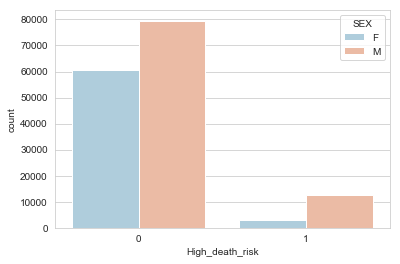

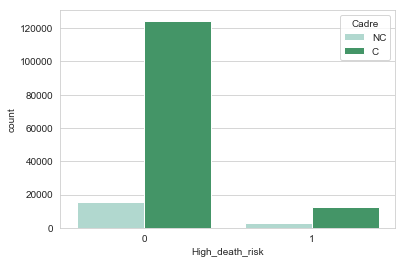

In [7]:
#sns.barplot(x = 'Cadre',y = 'High_death_risk', data = data)
sns.set_style('whitegrid')
sns.countplot(x='High_death_risk', hue='Cadre', data=data, palette='BuGn')

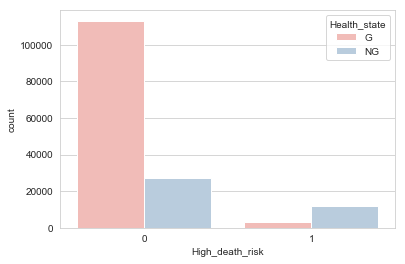

In [8]:
#sns.barplot(x = 'Health_state',y = 'High_death_risk', data = data)
sns.set_style('whitegrid')
sns.countplot(x='High_death_risk', hue='Health_state', data=data, palette='Pastel1')

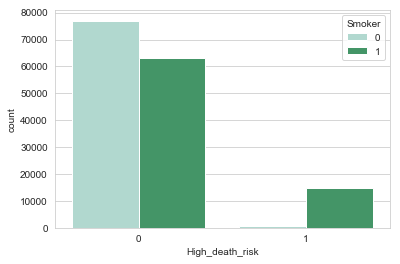

In [9]:
#sns.barplot(x = 'Cadre',y = 'High_death_risk', data = data)
sns.set_style('whitegrid')
sns.countplot(x='High_death_risk', hue='Smoker', data=data, palette='BuGn')

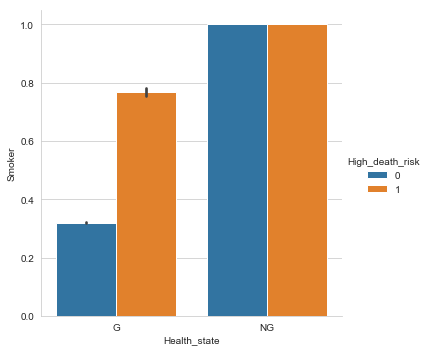

In [88]:
sns.catplot(x="Health_state", y="Smoker", hue="High_death_risk", kind="bar", data=data)

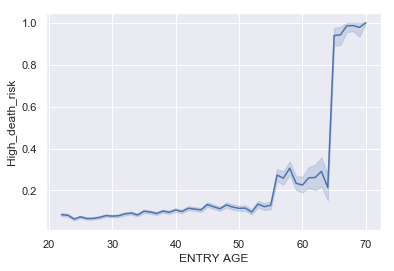

In [110]:

sns.lineplot(x='ENTRY AGE',y='High_death_risk',data=data)

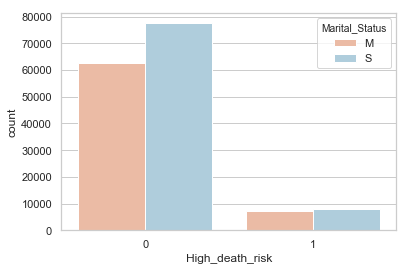

In [111]:
#sns.barplot(x = 'Marital_Status',y = 'High_death_risk', data = data)

sns.set_style('whitegrid')
sns.countplot(x='High_death_risk', hue='Marital_Status', data=data, palette='RdBu')

In [112]:
print("Married",(data['Marital_Status']=='M').sum(),"Single",(data['Marital_Status']=='S').sum())

Married 69895 Single 85642


## Step4-Nettoyage Des données (Si nécessaire)

In [113]:
missing_val_count_by_column = (data.isnull().sum()/len(data))
print(missing_val_count_by_column)

ENTRY AGE            0.000000
SEX                  0.000000
Policy Year          0.000000
Smoker               0.000000
Cadre                0.000000
Health_state         0.000000
Salary               0.026245
Marital_Status       0.001457
Death_Probability    0.000000
High_death_risk      0.000000
dtype: float64


In [114]:
data.dropna(subset=["Marital_Status"],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155537 entries, 0 to 155763
Data columns (total 10 columns):
ENTRY AGE            155537 non-null int64
SEX                  155537 non-null object
Policy Year          155537 non-null int64
Smoker               155537 non-null int64
Cadre                155537 non-null object
Health_state         155537 non-null object
Salary               151676 non-null float64
Marital_Status       155537 non-null object
Death_Probability    155537 non-null float64
High_death_risk      155537 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 13.1+ MB


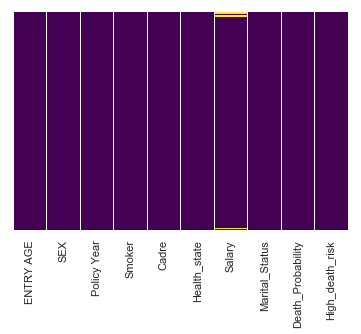

In [115]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Text(0.5, 1.0, 'Salaire par Status Professionnelle')

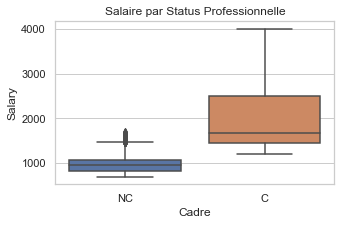

In [116]:
plt.figure(figsize=(5, 3))
sns.boxplot('Cadre', 'Salary', data= data).set_title('Salaire par Status Professionnelle')

In [117]:
def impute_Salary(cols):
    Salary = cols[0]
    Cadre = cols[1]

    if pd.isnull(Salary):
        if    Cadre == 'C':
            return 1700
        else:
            return 900
    else:
        return Salary

In [118]:
# Now apply that function!
data['Salary'] = data[['Salary','Cadre']].apply(impute_Salary,axis=1)

## Step4'-Affichage des données nettoyées. (Equivalent à step3)

In [119]:
missing_val_count_by_column = (data.isnull().sum()/len(data))
missing_val_count_by_column

ENTRY AGE            0.0
SEX                  0.0
Policy Year          0.0
Smoker               0.0
Cadre                0.0
Health_state         0.0
Salary               0.0
Marital_Status       0.0
Death_Probability    0.0
High_death_risk      0.0
dtype: float64

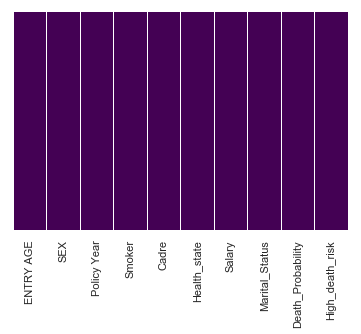

In [120]:
#Now let’s check that heatmap again!
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [121]:
SEX = pd.get_dummies(data['SEX'],drop_first=True)
Cadre = pd.get_dummies(data['Cadre'],drop_first=True)
Health_state = pd.get_dummies(data['Health_state'],drop_first=True)
Marital_Status = pd.get_dummies(data['Marital_Status'],drop_first=True)
#drop the sex,embarked,name and tickets columns
data.drop(['SEX','Cadre','Health_state','Marital_Status'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe
data = pd.concat([SEX,Cadre,Health_state,Marital_Status,data],axis=1)
#check the head of dataframe
data.head()

,M,NC,NG,S,ENTRY AGE,Policy Year,Smoker,Salary,Death_Probability,High_death_risk
0,0,1,0,0,36,4,1,1443.0,0.0017,1
1,1,1,0,0,42,4,1,1347.0,0.0025,1
2,1,1,0,1,40,4,0,1212.0,0.0022,0
3,1,1,1,0,39,4,1,1411.0,0.0020,1
4,1,1,0,1,44,4,0,1098.0,0.0030,0


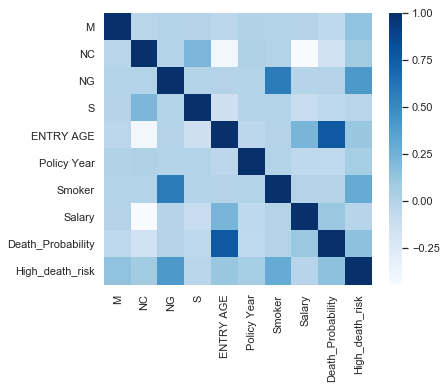

In [122]:
fig_size = (6, 5)
fig, ax = plt.subplots(figsize=fig_size)
sns.heatmap(data.corr(), cmap="Blues")

In [123]:
#methode de corrélation par défaut : mesure de pearson : standard correlation coefficient
corr_matrix = data.corr()
corr_matrix

,M,NC,NG,S,ENTRY AGE,Policy Year,Smoker,Salary,Death_Probability,High_death_risk
M,1.000000,-0.022052,0.002286,-0.010640,-0.039372,0.006809,0.000634,-0.003495,-0.049385,0.141660
NC,-0.022052,1.000000,0.005057,0.217994,-0.404232,0.026638,0.002580,-0.446792,-0.148984,0.077955
NG,0.002286,0.005057,1.000000,0.000937,-0.002456,0.001025,0.578330,-0.006425,-0.004610,0.406839
S,-0.010640,0.217994,0.000937,1.000000,-0.135525,0.001042,0.001267,-0.100428,-0.047988,-0.017447
ENTRY AGE,-0.039372,-0.404232,-0.002456,-0.135525,1.000000,-0.037801,-0.002758,0.226902,0.770107,0.112881
Policy Year,0.006809,0.026638,0.001025,0.001042,-0.037801,1.000000,0.002297,-0.049162,-0.059543,0.060014
Smoker,0.000634,0.002580,0.578330,0.001267,-0.002758,0.002297,1.000000,-0.002117,-0.004762,0.298086
Salary,-0.003495,-0.446792,-0.006425,-0.100428,0.226902,-0.049162,-0.002117,1.000000,0.108261,-0.013903
Death_Probability,-0.049385,-0.148984,-0.004610,-0.047988,0.770107,-0.059543,-0.004762,0.108261,1.000000,0.156048
High_death_risk,0.141660,0.077955,0.406839,-0.017447,0.112881,0.060014,0.298086,-0.013903,0.156048,1.000000


## Step5- Split Dataset (Training and Test) By using Cross Validation ou l'une de ses variantes.

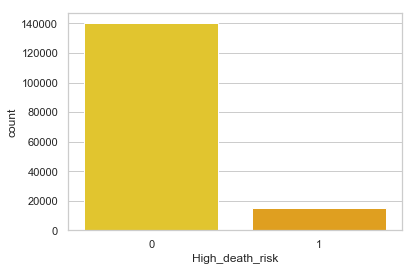

In [124]:

sns.set_style('whitegrid')
sns.countplot(x='High_death_risk', data=data, palette='Wistia')

In [125]:
print('la proportion des décédès dans la base est',(data['High_death_risk']==1).sum()/len(data),'\n','la proportion des survivants dans la base est',(data['High_death_risk']==0).sum()/len(data))

la proportion des décédès dans la base est 0.09886393591235526 
 la proportion des survivants dans la base est 0.9011360640876448


In [126]:
#from sklearn.model_selection import GridSearchCV

In [127]:
#Train Test Split
#X will contain all the features and y will contain the target variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('High_death_risk',axis=1), 
           data['High_death_risk'], test_size=0.20, stratify=data['High_death_risk'])

In [128]:
#Nous présentons ici la proportion des cas survivant et des décédès
#entre base test et base train comme covenus et résultant de la méthodologie adoptée précedemment:
print('décédés dans base train et leurs proportion% nombre décédés total',[(y_train==1).sum(),(y_train==1).sum()/(data['High_death_risk']==1).sum()])
print('survivants dans base train et leurs proportion% nombre des survivants total',[(y_train==0).sum(),(y_train==0).sum()/(data['High_death_risk']==0).sum()])
print('décédés dans base test  et leurs proportion% nombre décédés total',[(y_test==1).sum(),(y_test==1).sum()/(data['High_death_risk']==1).sum()])
print('survivants dans base test et leurs proportion% nombre des survivants total',[(y_test==0).sum(),(y_test==0).sum()/(data['High_death_risk']==0).sum()])

décédés dans base train et leurs proportion% nombre décédés total [12302, 0.8000260128763738]
survivants dans base train et leurs proportion% nombre des survivants total [112127, 0.7999928652968037]
décédés dans base test  et leurs proportion% nombre décédés total [3075, 0.19997398712362618]
survivants dans base test et leurs proportion% nombre des survivants total [28033, 0.20000713470319634]


## Step6-Paramétré l'algorithme d'apprentissage.

# choix de paramètres de notre algorithe de régression logistique

C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' 

C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

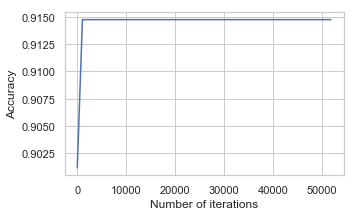

In [129]:
# Checking the convergence of the model logistic regression
n_iter = np.linspace(1,int(len(data)/3))
scores = np.array([])
for n in n_iter:
    model = LogisticRegression(max_iter=n)
    model.fit(X_train, y_train)
    scores = np.append(scores, model.score(X_test, y_test))
fig = plt.figure(1, figsize=(5, 3))    
plt.plot(n_iter, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()

In [31]:
#import sklearn
#modelcv=sklearn.linear_model.LogisticRegressionCV( fit_intercept=True, cv=int(len(y_train)/2000),max_iter=2000)
#modelcv.fit(X_train, y_train)
#print(modelcv.score(X_test,y_test))

#  choix de paramètres de notre algorithme de l'Arbre De Décision

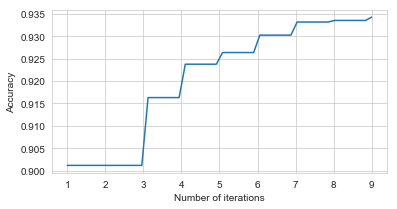

In [32]:
# Checking the convergence of the model DecisionTreeClassifier
n_iter = np.linspace(1,9)
scores = np.array([])
for n in n_iter:
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=n)
    clf.fit(X_train, y_train)
    scores = np.append(scores, clf.score(X_test, y_test))
fig = plt.figure(1, figsize=(6, 3))    
plt.plot(n_iter, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()

# Checking the convergence of the model KNN

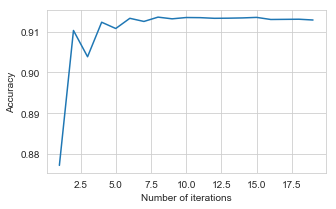

In [33]:

n = list(range(1,20))
scores = np.array([])
for k in n:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores = np.append(scores, knn.score(X_test, y_test))
fig = plt.figure(1, figsize=(5, 3))    
plt.plot(n, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()#  choix de paramètres de notre algorithme de KPPV

## Step7-Apprentissage.

In [42]:
#appel à l'algorithme du modèle Régression linéaire
Linear_reg= LogisticRegression(max_iter=2000)
# Fit du modèle Régression linéaire apprentissage du modèle
Linear_reg.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\envs\MDS\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
#appel à l'algorithme du modèle KPPV
knn = KNeighborsClassifier(n_neighbors=8)
# Fit du modèle KPPV apprentissage du modèle
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [44]:
#appel à l'algorithme du modèle tree
Tree = DecisionTreeClassifier(criterion="entropy", max_depth=9)
# Fit du modèle tree apprentissage du modèle
Tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Step8-Prediction.

In [45]:
# Use the .predict() method to make predictions from the X_test subset pour le KPPV et régression logistique
Y_pred_knn = knn.predict(X_test)
Y_pred_Linearreg = Linear_reg.predict(X_test)
Y_pred_Tree = Tree.predict(X_test)

## Step9- Validation par des mesures de performances ex: loss function, acuracy, etc

In [51]:
# illustration des rapport de classification KPPV
print(classification_report(y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     28033
           1       0.89      0.14      0.25      3075

   micro avg       0.91      0.91      0.91     31108
   macro avg       0.90      0.57      0.60     31108
weighted avg       0.91      0.91      0.88     31108



In [54]:
# illustration des rapport de classification Regression logistique
print(classification_report(y_test, Y_pred_Linearreg))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     28033
           1       0.63      0.31      0.42      3075

   micro avg       0.91      0.91      0.91     31108
   macro avg       0.78      0.65      0.69     31108
weighted avg       0.90      0.91      0.90     31108



In [55]:
# illustration des rapport de classification Arbre de décision
print(classification_report(y_test, Y_pred_Tree))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     28033
           1       0.74      0.52      0.61      3075

   micro avg       0.93      0.93      0.93     31108
   macro avg       0.84      0.75      0.79     31108
weighted avg       0.93      0.93      0.93     31108



In [82]:
#illustration de la matrice de confusion KPPV
cmat = confusion_matrix(y_test, Y_pred_knn)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 27980
FP - False Positive 53
FN - False Negative 2635
TP - True Positive 440
Accuracy Rate: 0.9135913591359136
Misclassification Rate: 0.08640864086408641


In [57]:
#illustration de la matrice de confusion Régression logistique
cmat = confusion_matrix(y_test, Y_pred_Linearreg)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 27471
FP - False Positive 562
FN - False Negative 2110
TP - True Positive 965
Accuracy Rate: 0.9141056962839141
Misclassification Rate: 0.08589430371608589


In [79]:
#illustration de la matrice de confusion Régression logistique
cmat = confusion_matrix(y_test, Y_pred_Tree)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))
print(cmat)

TP - True Negative 27465
FP - False Positive 568
FN - False Negative 1477
TP - True Positive 1598
Accuracy Rate: 0.9342612832711843
Misclassification Rate: 0.06573871672881573
[[27465   568]
 [ 1477  1598]]


In [61]:
#illustration de la matrice de confusion Régression logistique
cmat = confusion_matrix(y_test, Y_pred_knn)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 27980
FP - False Positive 53
FN - False Negative 2635
TP - True Positive 440
Accuracy Rate: 0.9135913591359136
Misclassification Rate: 0.08640864086408641


In [64]:
#The precision score for the survived passengers is decent (see below) but not good enough for our specific problem that requires precision to be as high as possible.
# Printing the precision score for survived passengers

print(sklearn.metrics.precision_score(y_test,  Y_pred_knn),
sklearn.metrics.precision_score(y_test, Y_pred_Linearreg),
sklearn.metrics.precision_score(y_test, Y_pred_Tree))

0.8924949290060852 0.6319580877537656 0.7377654662973222


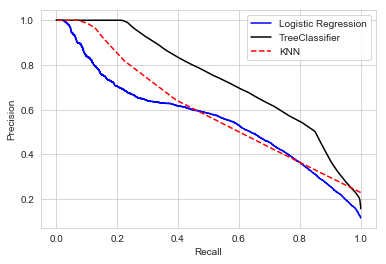

In [76]:
# Plotting the Precision-Recall curve Linear Regression
y_proba_train_Logreg = Linear_reg.predict_proba(X_train)[:, 1]
p, r, t = sklearn.metrics.precision_recall_curve(y_train, y_proba_train_Logreg)
# Plotting the Precision-Recall curve Tree
y_proba_train_Tree = Tree.predict_proba(X_train)[:, 1]
p1, r1, t1 = sklearn.metrics.precision_recall_curve(y_train, y_proba_train_Tree)
# Plotting the Precision-Recall curve knn
y_proba_train_knn = knn.predict_proba(X_train)[:, 1]
p2, r2, t2 = sklearn.metrics.precision_recall_curve(y_train, y_proba_train_knn)


plt.subplot()
plt.plot(r,p, "b",label="Logistic Regression")
plt.plot(r1,p1, "k",label="TreeClassifier")
plt.plot(r2,p2, "r--",label="KNN")
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()